##Importing MNIST dataset


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


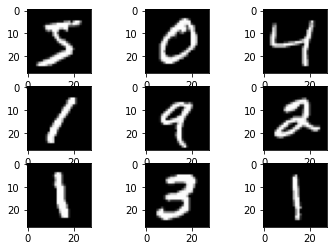

In [19]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [20]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

## **One Hot Encoding**

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
trainy = tf.keras.utils.to_categorical(trainy)
testy = tf.keras.utils.to_categorical(testy)
print(trainy.shape)
print(testy.shape)

(60000, 10)
(10000, 10)


In [22]:
import numpy as np
np.max(testX)

255

In [23]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 64, 64, 1))
	testX = testX.reshape((testX.shape[0], 64, 64, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [24]:

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

trainX, testX = prep_pixels(trainX, testX)

##**Exploration 1.**

Defining Model

In [ ]:
# define cnn model with n pixel size 
def define_model(n):
	model = Sequential()
	model.add(Conv2D(n, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	#opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
def general(n,x_train,y_train , X_test,y_test):
  model = define_model(n)
  model.fit(x_train, y_train, epochs=5,verbose = None,batch_size=32)
      # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total

In [ ]:
import time
train = []
test = []
total_time = []
label = [3, 4, 32, 128, 512, 2056]
for i in label:
  train_acc, test_acc, total = general(i,trainX, trainy, testX,testy)
  train.append(train_acc)
  test.append(test_acc)
  total_time.append(total)

313/313 [==============================] - 44s 142ms/step - loss: 0.0581 - accuracy: 0.9840


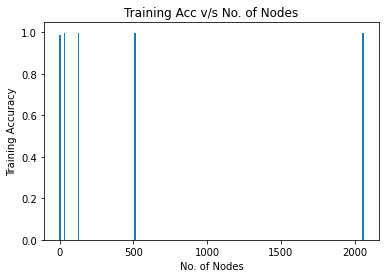

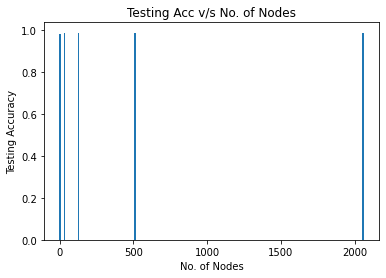

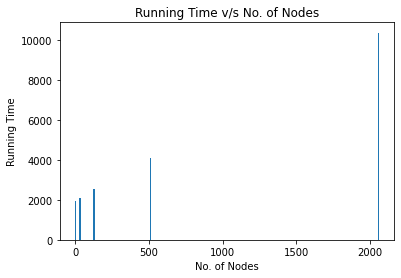

In [ ]:
import matplotlib.pyplot as plt 
# creating the bar plot 
plt.bar(label, train, width = 10) 

plt.xlabel("No. of Nodes") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s No. of Nodes") 
plt.show() 

plt.bar(label, test, width = 10 ) 
  
plt.xlabel("No. of Nodes") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s No. of Nodes") 
plt.show() 

plt.bar(label, total_time, width = 10 ) 
  
plt.xlabel("No. of Nodes") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s No. of Nodes") 
plt.show() 

##2. Number of Layers:

In [27]:
def model_lay(n,x_train,y_train,X_test,y_test):
  model = keras.Sequential()
  if(n==1):
    model.add(Conv2D(n, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

  elif(n==2):
    model.add(Conv2D(n, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
  
    model.add(Conv2D(n, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

  elif(n==3):
    model.add(Conv2D(n, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(n, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(n, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())

    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

  elif(n==4):
    model.add(Conv2D(n, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(n, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(n, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(n, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())

    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
  
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  start = time.time()
  model.fit(x_train, y_train, epochs=5,verbose = None,batch_size=32)
      # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total

In [ ]:
import time
train = []
test = []
total_time = []
label = [1,2,3]
for i in label:
  train_acc, test_acc, total = model_lay(i,trainX, trainy, testX,testy)
  train.append(train_acc)
  test.append(test_acc)
  total_time.append(total)


313/313 [==============================] - 2s 7ms/step - loss: 0.1078 - accuracy: 0.7802


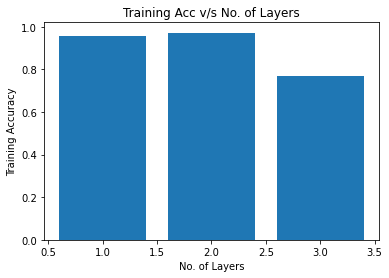

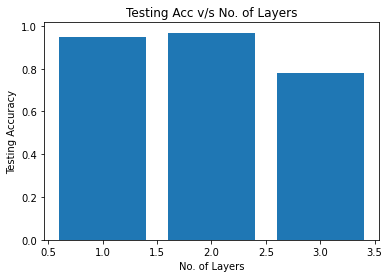

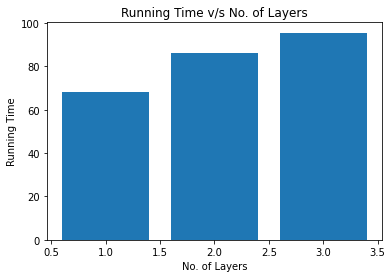

In [ ]:
import matplotlib.pyplot as plt 
# creating the bar plot 
plt.bar(label, train) 

plt.xlabel("No. of Layers") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s No. of Layers") 
plt.show() 

plt.bar(label, test ) 
  
plt.xlabel("No. of Layers") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s No. of Layers") 
plt.show() 

plt.bar(label, total_time ) 
  
plt.xlabel("No. of Layers") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s No. of Layers") 
plt.show() 

##3. Size of Filters:

In [ ]:
def filter(n,x_train,y_train , X_test,y_test):
  model = keras.Sequential()
  model.add(Conv2D(16, (n, n), activation='relu',  input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(16, (n, n), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(x_train, y_train, epochs=5,verbose = None,batch_size=32)
      # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total

In [ ]:
import time
train = []
test = []
total_time = []
label = [3,5,7]
for i in label:
  train_acc, test_acc, total = filter(i,trainX, trainy, testX,testy)
  train.append(train_acc)
  test.append(test_acc)
  total_time.append(total)


313/313 [==============================] - 2s 6ms/step - loss: 0.0397 - accuracy: 0.9862


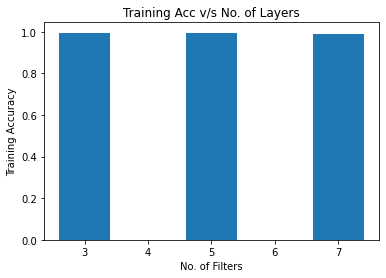

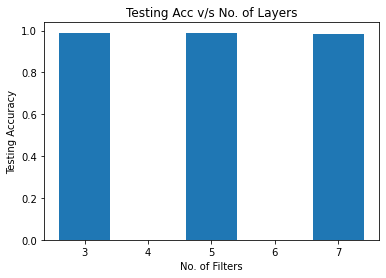

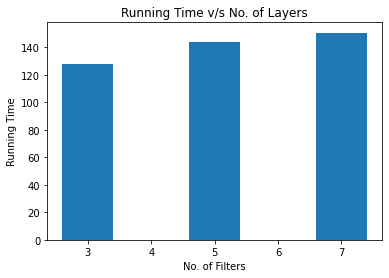

In [ ]:
import matplotlib.pyplot as plt 
# creating the bar plot 
plt.bar(label, train) 

plt.xlabel("No. of Filters") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s No. of Layers") 
plt.show() 

plt.bar(label, test ) 
  
plt.xlabel("No. of Filters") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s No. of Layers") 
plt.show() 

plt.bar(label, total_time ) 
  
plt.xlabel("No. of Filters") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s No. of Layers") 
plt.show() 

##4. Activation function

In [7]:
def filter(activation,x_train,y_train , X_test,y_test):
  model = Sequential()
  model.add(Conv2D(16, (3, 3), activation=activation,  input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(16, (3, 3), activation=activation))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation=activation))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(x_train, y_train, epochs=10,verbose = None,batch_size=32)
  # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total

In [8]:
import time
train = []
test = []
total_time = []
label = ['sigmoid','tanh', 'relu']
for i in label:
  train_acc, test_acc, total = filter(i,trainX, trainy, testX,testy)
  train.append(train_acc)
  test.append(test_acc)
  total_time.append(total)


313/313 [==============================] - 2s 7ms/step - loss: 0.0371 - accuracy: 0.9893


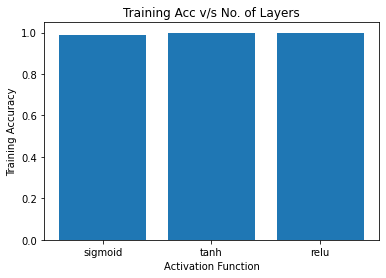

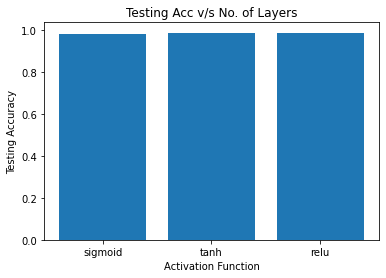

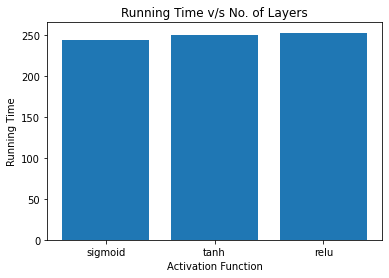

In [9]:
import matplotlib.pyplot as plt 
# creating the bar plot 
plt.bar(label, train) 

plt.xlabel("Activation Function") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s No. of Layers") 
plt.show() 

plt.bar(label, test ) 
  
plt.xlabel("Activation Function") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s No. of Layers") 
plt.show() 

plt.bar(label, total_time ) 
  
plt.xlabel("Activation Function") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s No. of Layers") 
plt.show() 

Run the same models for 10 epochs. Any changes?

Accuracy has increased

###5. Filter Size combinations

In [13]:
def filter_size(m,n,x_train,y_train , X_test,y_test):
  model = keras.Sequential()
  model.add(Conv2D(16, (m, m), activation='relu',  input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(16, (n, n), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(x_train, y_train, epochs=5,verbose = None,batch_size=32)
      # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total

In [14]:
import time

train_acc, test_acc, total = filter_size(3,5,trainX, trainy, testX,testy)
print("The Training Accuray: ",train_acc)
print("The Testing Accuracy: ", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0325 - accuracy: 0.9903
The Training Accuray:  0.9944166541099548
The Testing Accuracy:  0.9902999997138977


##6. Layer-filter combinations
Decreasing filters

In [17]:
def layer_filter(a,b,c,x_train,y_train , X_test,y_test):
  model = keras.Sequential()
  model.add(Conv2D(a, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(b, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  
  model.add(Conv2D(c, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(x_train, y_train, epochs=5,verbose = None,batch_size=32)
      # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total

In [25]:
import time
print("For decreasing filter")
train_acc, test_acc, total = layer_filter(64,32,16,trainX, trainy, testX,testy)
print("The Training Accuray: ",train_acc)
print("The Testing Accuracy: ", test_acc)
print('\n\nFor increasing filters')
train_acc, test_acc, total = layer_filter(16,32,64,trainX, trainy, testX,testy)
print("The Training Accuray: ",train_acc)
print("The Testing Accuracy: ", test_acc)

For decreasing filter
313/313 [==============================] - 3s 10ms/step - loss: 0.0547 - accuracy: 0.9840
The Training Accuray:  0.987766683101654
The Testing Accuracy:  0.984000027179718


For increasing filters
313/313 [==============================] - 2s 8ms/step - loss: 0.0539 - accuracy: 0.9832
The Training Accuray:  0.9882833361625671
The Testing Accuracy:  0.9832000136375427


##7. Influence of Striding:

In [34]:
def stride(n,filter,x_train,y_train , X_test,y_test):
  model = keras.Sequential()
  model.add(Conv2D(32, (filter, filter), strides=(n,n) ,activation='relu',  input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(32, (filter, filter), strides=(n,n), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(x_train, y_train, epochs=5,verbose = None,batch_size=32)
      # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total


In [33]:
import time
train = []
test = []
total_time = []
label = [2,3]
filter = 3
train_acc, test_acc, total = model_lay(2,filter,trainX, trainy, testX,testy)
train.append(train_acc)
test.append(test_acc)
total_time.append(total)
for i in label:

  train_acc, test_acc, total = stride(i,trainX, trainy, testX,testy)
  train.append(train_acc)
  test.append(test_acc)
  total_time.append(total)
# there will be the error because of image size.

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9741


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt 
# creating the bar plot 
label = [None,2,3]
plt.bar(label, train) 

plt.xlabel("Striding") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Striding") 
plt.show() 

plt.bar(label, test ) 
  
plt.xlabel("Striding") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s No. of Layers") 
plt.show() 

plt.bar(label, total_time ) 
  
plt.xlabel("Striding") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Striding") 
plt.show() 

##8. Influence of Padding:

In [36]:
def padding(filter,x_train,y_train , X_test,y_test):
  model = keras.Sequential()
  model.add(Conv2D(32, (filter, filter), padding='same' ,activation='relu',  input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(32, (filter, filter), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(x_train, y_train, epochs=5,verbose = None,batch_size=32)
      # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total


In [40]:
import time
train = []
test = []
total_time = []
label = [3,5,7]

for i in label:
  train_acc, test_acc, total = padding(i,trainX, trainy, testX,testy)
  train.append(train_acc)
  test.append(test_acc)
  total_time.append(total)

313/313 [==============================] - 8s 25ms/step - loss: 0.0303 - accuracy: 0.9906


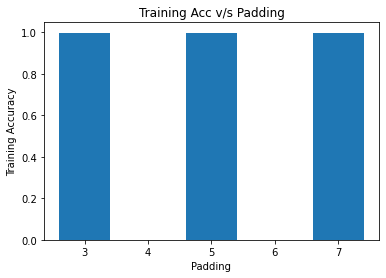

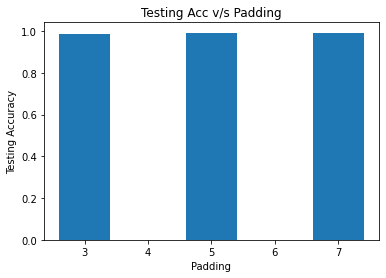

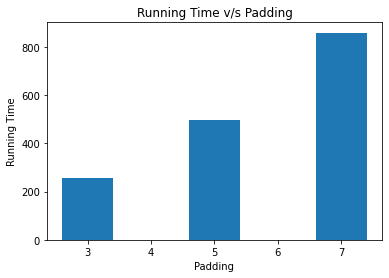

In [41]:
import matplotlib.pyplot as plt 
# creating the bar plot 

plt.bar(label, train) 

plt.xlabel("Padding") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Padding") 
plt.show() 

plt.bar(label, test ) 
  
plt.xlabel("Padding") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s Padding") 
plt.show() 

plt.bar(label, total_time ) 
  
plt.xlabel("Padding") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Padding") 
plt.show() 

##9. Influence of Pooling:

In [42]:
def pooling(i,filter,x_train,y_train , X_test,y_test):
  model = keras.Sequential()
  model.add(Conv2D(32, (filter, filter), padding='same' ,activation='relu',  input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((i, i)))

  model.add(Conv2D(32, (filter, filter), padding='same', activation='relu'))
  model.add(MaxPooling2D((i, i)))

  model.add(Flatten())

  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(x_train, y_train, epochs=5,verbose = None,batch_size=32)
      # sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # end time
  end = time.time()
  _, train_acc = model.evaluate(x_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)

  total = end-start
  return train_acc, test_acc, total


In [43]:
import time
train = []
test = []
total_time = []
label = [2,3]

for i in label:

  train_acc, test_acc, total = pooling(i,3,trainX, trainy, testX,testy)
  train.append(train_acc)
  test.append(test_acc)
  total_time.append(total)

313/313 [==============================] - 2s 8ms/step - loss: 0.0513 - accuracy: 0.9850


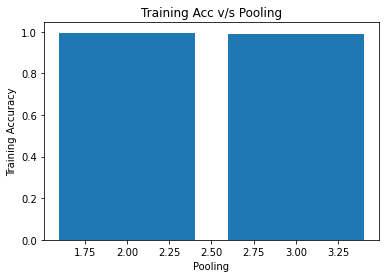

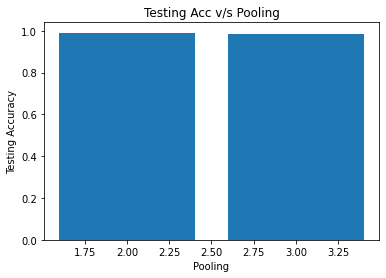

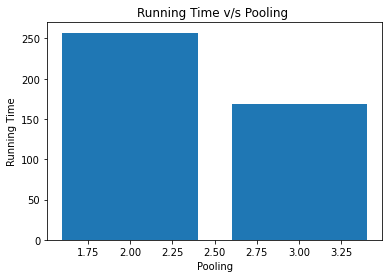

In [44]:
import matplotlib.pyplot as plt 
# creating the bar plot 

plt.bar(label, train) 

plt.xlabel("Pooling") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Pooling") 
plt.show() 

plt.bar(label, test ) 
  
plt.xlabel("Pooling") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s Pooling") 
plt.show() 

plt.bar(label, total_time ) 
  
plt.xlabel("Pooling") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Pooling ") 
plt.show() 